Итерация 0, Ошибка (MSE): 13395261.63
Итерация 100, Ошибка (MSE): 2518.06
Итерация 200, Ошибка (MSE): 2518.06
Итерация 300, Ошибка (MSE): 2518.06
Итерация 400, Ошибка (MSE): 2518.06
Итерация 500, Ошибка (MSE): 2518.06
Итерация 600, Ошибка (MSE): 2518.06
Итерация 700, Ошибка (MSE): 2518.06
Итерация 800, Ошибка (MSE): 2518.06
Итерация 900, Ошибка (MSE): 2518.06


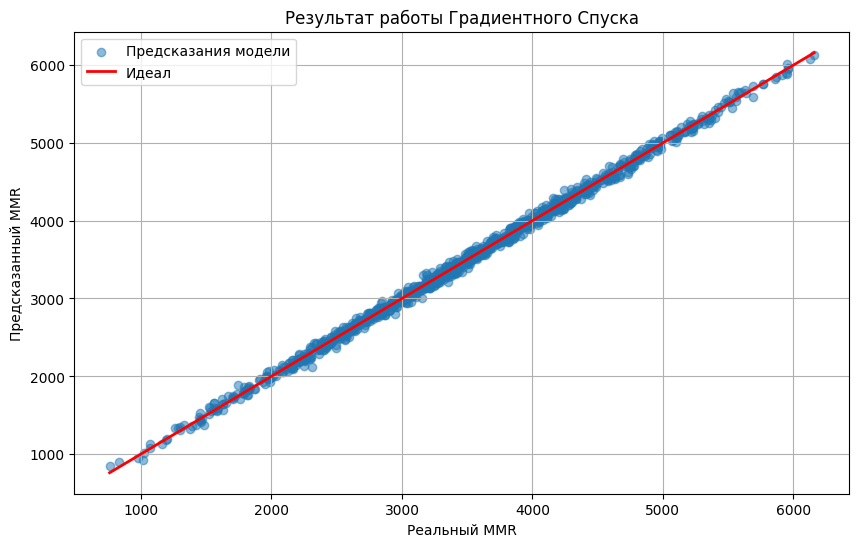


Финальные веса градиентного спуска:
 [3508.72614402  717.64501008  592.37597894  436.20983981]

Веса аналитического решения (для сравнения):
 [500.17280515   0.50063667  20.00393392   9.9745656 ]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- ЭТАП 1: ГЕНЕРАЦИЯ ДАННЫХ (Создаем наш мир) ---
np.random.seed(42) # Фиксируем "сид", чтобы результаты были воспроизводимы
n_players = 1000

# Генерируем 3 признака: Часы, % Хедшотов, Средний урон (ADR)
X = np.random.rand(n_players, 3)
X[:, 0] *= 5000  # Растягиваем часы до 5000
X[:, 1] *= 100   # Растягиваем хедшоты до 100%
X[:, 2] *= 150   # Растягиваем урон до 150

# Задаем "законы физики" нашего мира (настоящие веса и базовый MMR)
true_w = np.array([0.5, 20, 10])
intercept = 500

# Считаем итоговый MMR (y) и добавляем случайный шум (разброс +/- 50 MMR)
# y = (X * веса + база) + шум
y = (X @ true_w + intercept) + np.random.normal(0, 50, size=n_players)

# --- ЭТАП 2: АНАЛИТИЧЕСКОЕ РЕШЕНИЕ (Нормальное уравнение) ---
# Добавляем столбец единиц, чтобы модель могла найти базовый MMR (intercept)
X_b = np.c_[np.ones((n_players, 1)), X]

# Формула: w = (X^T * X)^-1 * X^T * y
# Это "идеальное" решение за один шаг, но оно медленное для больших данных
w_analytical = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# --- ЭТАП 3: ПОДГОТОВКА К ГРАДИЕНТНОМУ СПУСКУ (Стандартизация) ---
# Чтобы градиент не "взрывался", приводим все признаки к одному масштабу
X_mean = np.mean(X, axis=0) # Среднее по каждому столбцу
X_std = np.std(X, axis=0)   # Разброс (стандартное отклонение) по каждому столбцу

# Формула стандартизации: (Значение - Среднее) / Разброс
X_scaled = (X - X_mean) / X_std

# Снова добавляем единицы, но уже к отмасштабированным данным
X_b_scaled = np.c_[np.ones((n_players, 1)), X_scaled]

# Превращаем y в вертикальный столбец (1000 строк, 1 колонка) для матричной математики
y_reshaped = y.reshape(-1, 1)

# --- ЭТАП 4: ГРАДИЕНТНЫЙ СПУСК (Итеративное обучение) ---
w = np.random.randn(4, 1) # Инициализируем 4 случайных веса (из нормального распределения)
learning_rate = 0.1       # Размер шага обучения
n_iterations = 1000       # Сколько раз мы обновим веса

for i in range(n_iterations):
    # 1. Считаем текущее предсказание
    y_pred = X_b_scaled @ w

    # 2. Считаем градиент (направление, куда нужно менять веса, чтобы ошибка падала)
    # Формула производной MSE: (2/N) * X^T * (Предсказание - Реальность)
    grad = (2 / n_players) * X_b_scaled.T @ (y_pred - y_reshaped)

    # 3. Обновляем веса: идем в сторону, противоположную градиенту
    w = w - learning_rate * grad

    # Раз в 100 шагов смотрим на ошибку (MSE)
    if i % 100 == 0:
        mse = np.mean((y_reshaped - y_pred)**2)
        print(f"Итерация {i}, Ошибка (MSE): {mse:.2f}")

# --- ЭТАП 5: ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТА ---
plt.figure(figsize=(10, 6))
final_pred = X_b_scaled @ w # Итоговое предсказание градиентного спуска
plt.scatter(y, final_pred, alpha=0.5, label='Предсказания модели')

# Рисуем идеальную линию (где предсказание = реальности)
lims = [np.min(y), np.max(y)]
plt.plot(lims, lims, color='red', lw=2, label='Идеал')

plt.xlabel('Реальный MMR')
plt.ylabel('Предсказанный MMR')
plt.title('Результат работы Градиентного Спуска')
plt.legend()
plt.grid(True)
plt.show()

print("\nФинальные веса градиентного спуска:\n", w.flatten())
print("\nВеса аналитического решения (для сравнения):\n", w_analytical)